In [1]:
!pip install -U mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [2]:
#importing 
import mxnet as mx
import numpy as np

import logging
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
#Preparing data
#Training data
train_data = np.random.uniform(0, 1, [100, 2])
train_label = np.array([train_data[i][0] + 2 * train_data[i][1] for i in range(100)])
batch_size = 1

#Evaluation Data
eval_data = np.array([[7,2],[6,10],[12,2]])
eval_label = np.array([11,26,16])

In [4]:
train_iter = mx.io.NDArrayIter(train_data,train_label, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(eval_data, eval_label, batch_size, shuffle=False)

In [5]:
#defining the model
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

In [7]:
#input network to module
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)

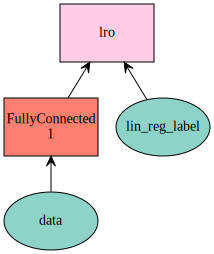

In [8]:
#visualize
mx.viz.plot_network(symbol=lro)

In [9]:
#training the model
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=20,
            eval_metric='mse',
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))

INFO:root:Epoch[0] Batch [0-2]	Speed: 705.87 samples/sec	mse=1.260079
INFO:root:Epoch[0] Batch [2-4]	Speed: 686.35 samples/sec	mse=3.329628
INFO:root:Epoch[0] Batch [4-6]	Speed: 231.21 samples/sec	mse=2.961703
INFO:root:Epoch[0] Batch [6-8]	Speed: 447.94 samples/sec	mse=1.981215
INFO:root:Epoch[0] Batch [8-10]	Speed: 443.02 samples/sec	mse=0.094215
INFO:root:Epoch[0] Batch [10-12]	Speed: 725.47 samples/sec	mse=1.085210
INFO:root:Epoch[0] Batch [12-14]	Speed: 719.06 samples/sec	mse=1.922871
INFO:root:Epoch[0] Batch [14-16]	Speed: 663.55 samples/sec	mse=1.137572
INFO:root:Epoch[0] Batch [16-18]	Speed: 502.16 samples/sec	mse=0.615862
INFO:root:Epoch[0] Batch [18-20]	Speed: 67.12 samples/sec	mse=0.546897
INFO:root:Epoch[0] Batch [20-22]	Speed: 620.41 samples/sec	mse=0.337551
INFO:root:Epoch[0] Batch [22-24]	Speed: 663.29 samples/sec	mse=0.326263
INFO:root:Epoch[0] Batch [24-26]	Speed: 659.90 samples/sec	mse=0.286557
INFO:root:Epoch[0] Batch [26-28]	Speed: 626.95 samples/sec	mse=0.022079
IN

In [10]:
#Using a trained model: (Testing and Inference)
model.predict(eval_iter).asnumpy()

array([[10.982929],
       [25.96141 ],
       [15.972923]], dtype=float32)

In [12]:
#evaluating our model’s mean squared error (MSE) on the evaluation data.
metric = mx.metric.MSE()
model.score(eval_iter, metric)
assert model.score(eval_iter, metric)[0][1] < 0.01001, "Achieved MSE (%f) is larger than expected (0.01001)" % model.score(eval_iter, metric)[0][1]